## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
cal_img_path = './camera_cal/calibration*.jpg'

## Display and Write images helper function
Below I define a two new helper functions: 
1. `display(imlist)` which displays the images on a given image list `imlist`. This will help during testing of each subsequent step of the pipeline applied to all input images. 
2. `write(imlist,output,path,imname_list,suffix)` which writes the images from the given `imlist` to the `output_path` by combining the given names from the `imname_list` with a predefined `suffix`.

In [3]:
def display(imlist):
    """
    The function displays all images of the given
    `imlist` in a n*2 plot where n is the number of images.
    """
    columns = 3
    rows = (len(imlist)+1)//columns
    plt.figure(figsize=(10,11))
    for i, img in enumerate(imlist):
        plt.subplot(rows, columns, i+1)
        # Check if the image is gray scale then plot it as such
        if len(img.shape) == 2:
            cmap = 'gray'
        # Othewise print it with color map
        else:
            cmap = None
        plt.imshow(img, cmap=cmap)
    plt.tight_layout()
    plt.show()
    
def compare_imgs(img1, img2, image_process="process"):
    """
    The function displays the images side by side for comparison
    """
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
    f.tight_layout()
    ax1.imshow(img1)
    ax1.set_title('original image', fontsize=50)
    ax2.imshow(img2)
    ax2.set_title(image_process+'ed image', fontsize=50)
    plt.subplots_adjust(left=0., right=1., top=0.9, bottom=0.)
    plt.savefig('./output_images/'+image_process)
    plt.show()
    
    
def write(imlist,output_path,imname_list, suffix):
    """
    The functions writes all images of the given `imlist`
    to the `output_path` combining the name from the given
    `imname_list` with the input `suffix`.
    """
    for img, filename in zip(imlist, imname_list):
        name, ext = os.path.splitext(filename)
        filename = "{name}_{suffix}{ext}".format(name=name,suffix=suffix,ext=ext)
        if len(img.shape) > 2:
            cv2.imwrite(os.path.join(output_path,filename), cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 
        else:
            cv2.imwrite(os.path.join(output_path,filename),img)

## First, I'll compute the camera calibration using chessboard images

In [4]:
def cal_getObjPointsImgPoints(cal_img_path, x=9, y=6):

    # prepare object imgpoints
    objp = np.zeros((x*y, 3), np.float32)
    objp[:,:2] = np.mgrid[0:x, 0:y].T.reshape(-1, 2)
    output_imgs = []
    output_path = './output_images/calibration_output/'

    # Arrays to store object points and image image points
    objpoints = [] # 3D points in real world space
    imgpoints = [] # 2D points in image plane

    # Make a list of calibration images
    images = glob.glob(cal_img_path)

    # Step through the list and search for chessboard corners
    for fname in images:

        img = mpimg.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Find chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (x, y), None)

        # If found, add object points and image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (x, y), corners, ret)
            output_imgs.append(img)

    # Return ret and corners the object points and image points
    return objpoints, imgpoints, output_imgs

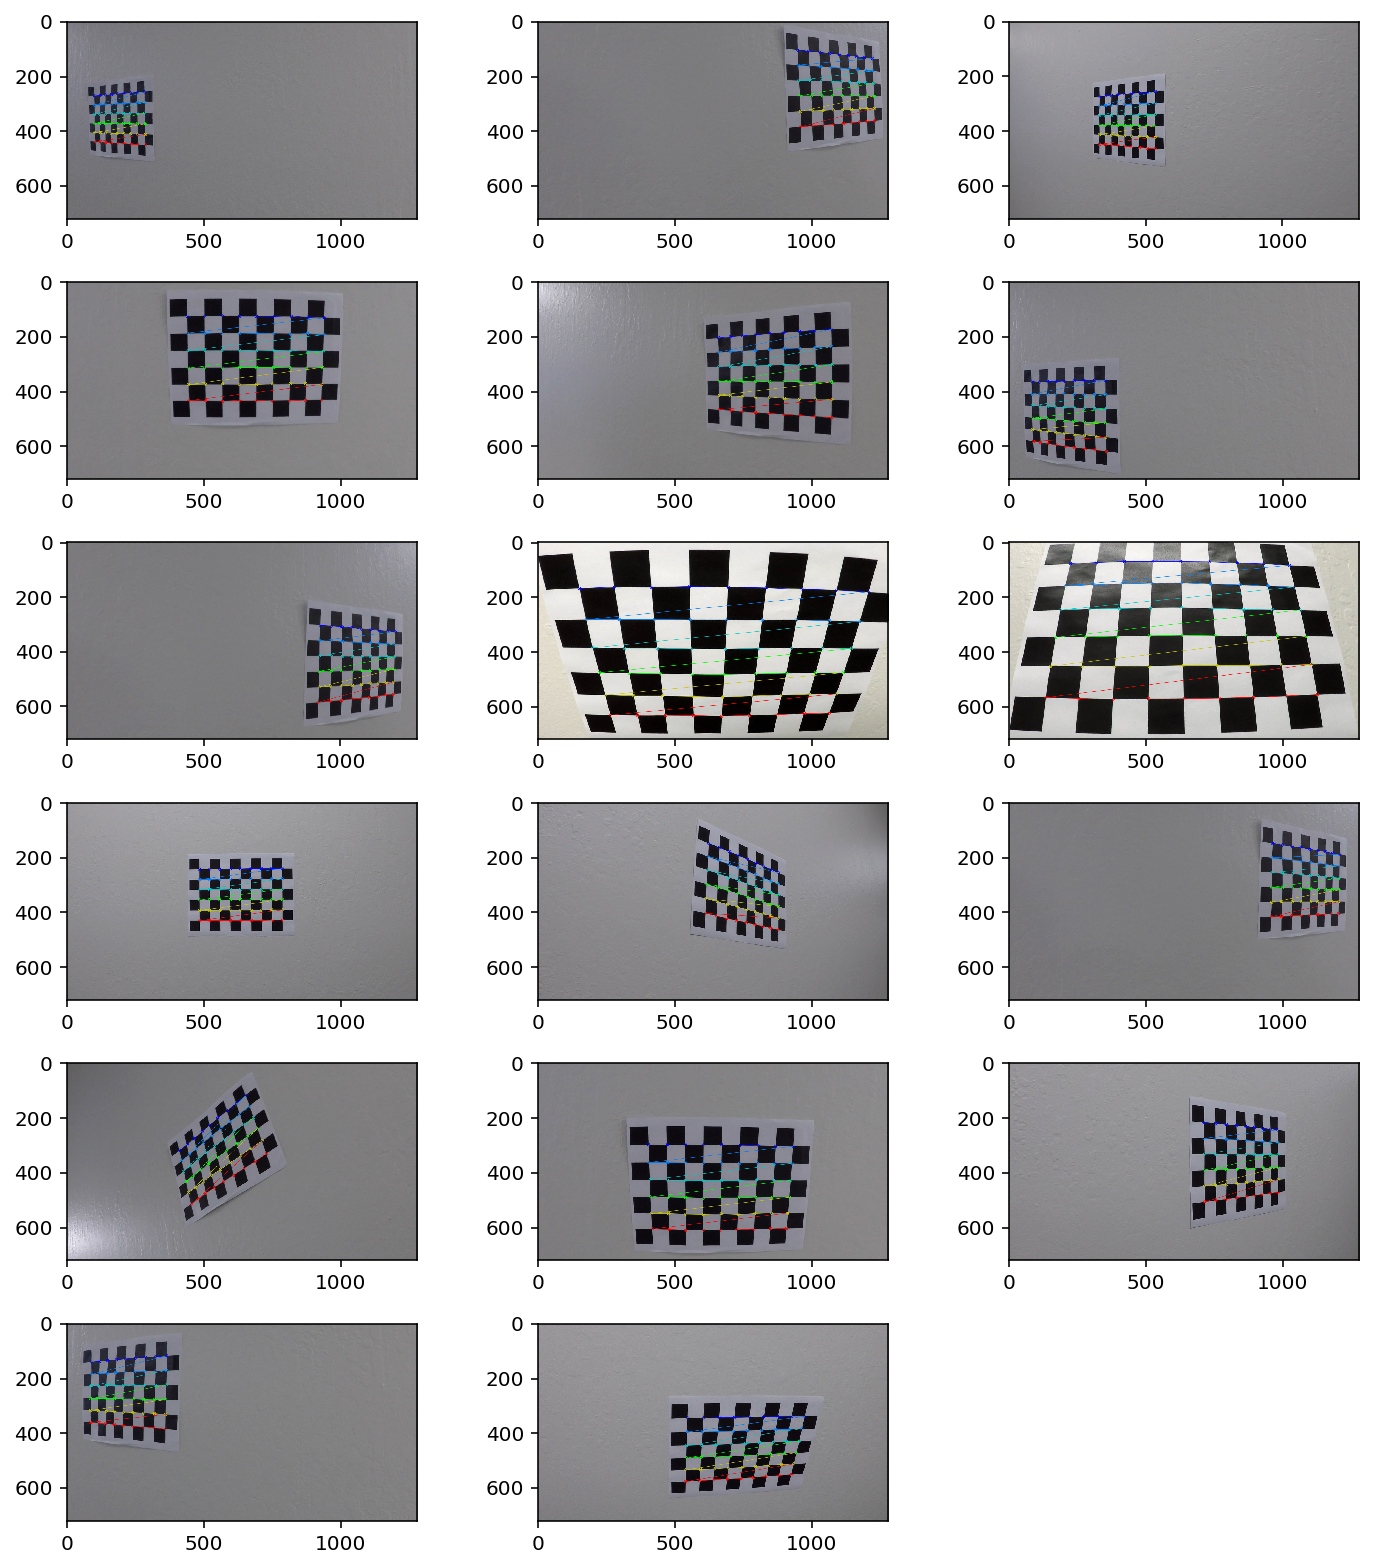

True

In [5]:
objpoints, imgpoints, cal_output_imgs = cal_getObjPointsImgPoints(cal_img_path)
display(cal_output_imgs)
# Saving image for the report
cv2.imwrite('output_images/calibration_output.jpg', cal_output_imgs[13])

## I'll calibrate the camera using the objpoints and image points found

In [6]:
# Pickng a random image just for the size
img = mpimg.imread('./camera_cal/calibration1.jpg')
# Perform grayscale colorspace change
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Get the size but first reversed (First x then y)
imshape = gray.shape[::-1]
# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imshape, None, None)


## Just an example of an undistorted image

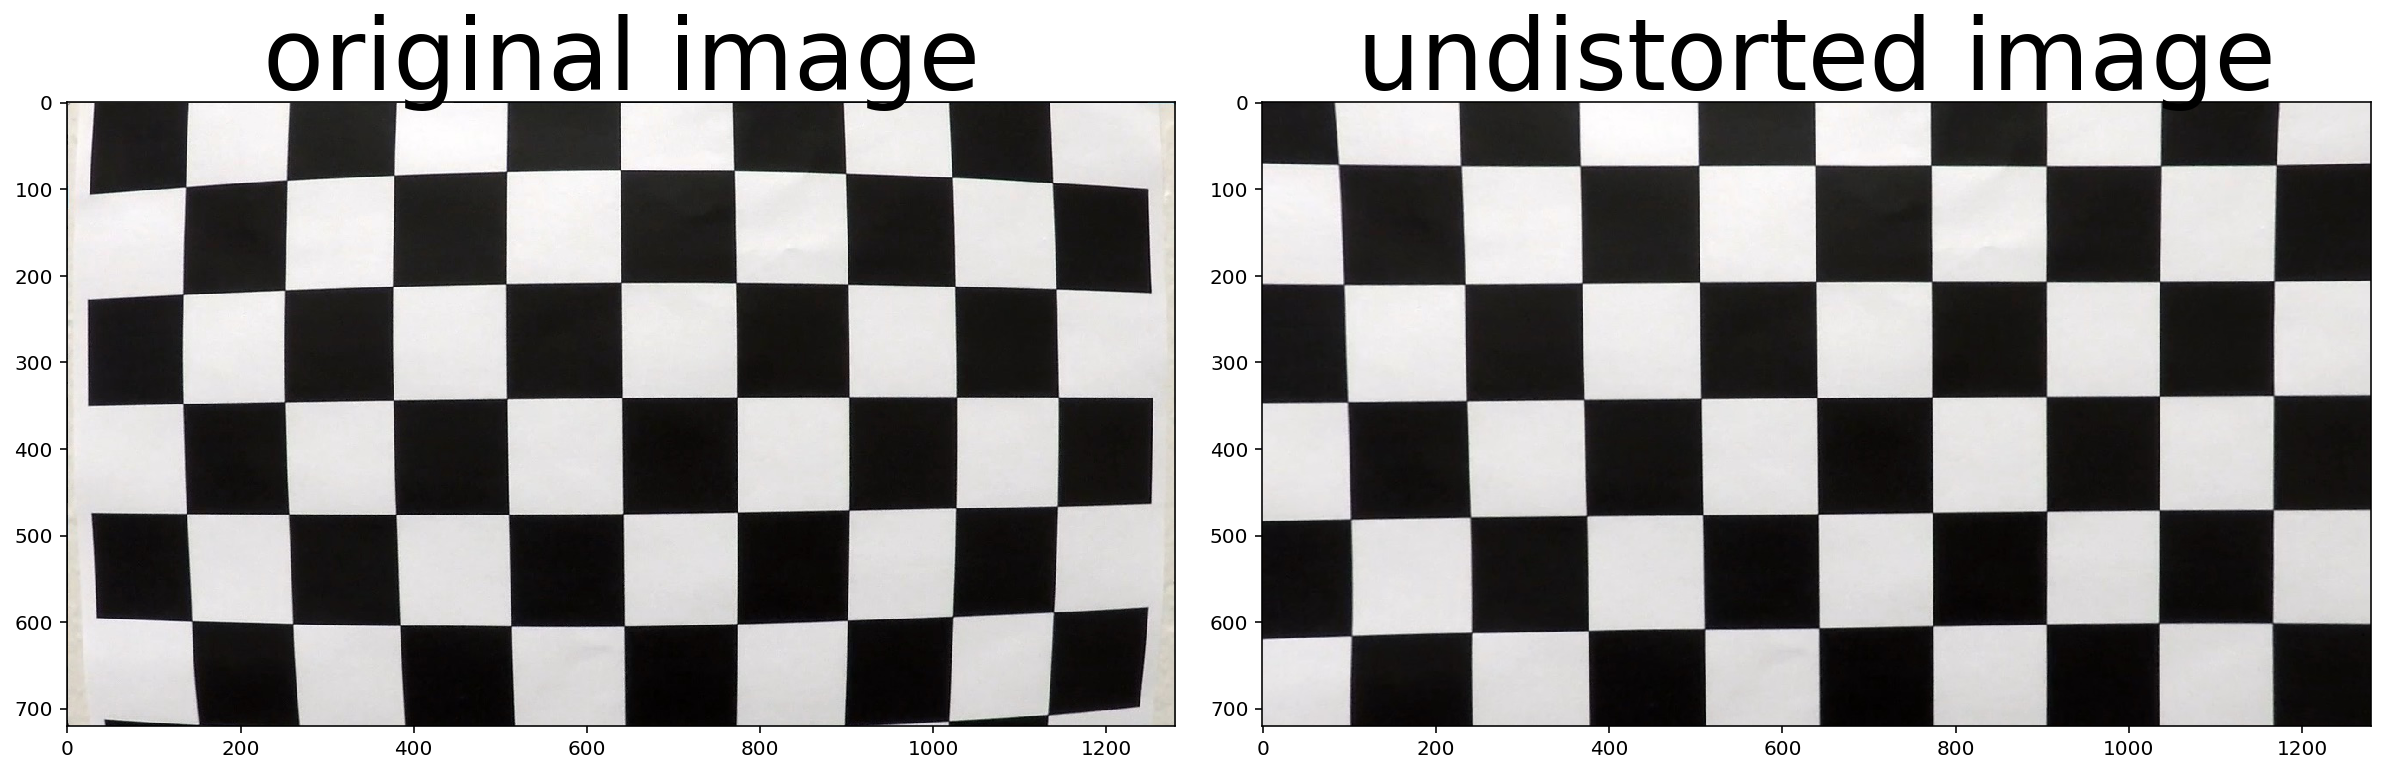

In [7]:
undist_img = cv2.undistort(img, mtx, dist, None, mtx)
compare_imgs(img, undist_img, 'undistort')

